In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
import re
precio = []
armenia ={'m':[],'hab':[],'ba':[],'estac':[]}
f = [k for k,v in armenia.items()]

def cotizacion(link):
    with open(link, 'r',encoding='utf-8') as html_file:
        content = html_file.read()
        #print(content)
        soup = BeautifulSoup(content, 'lxml')
        casa = soup.find_all('div', class_="sc-i1odl-2 khCJVZ")
        
        for data in casa:
            pro = data.find('div', class_="sc-12dh9kl-2 kwkFsn")
            info = data.find('div', class_ ="sc-i1odl-6 iIbNnx")
            if info:
                price = int(pro.div.text[4:].replace('.', ''))
                if price < 1000000:
                    #print(info.text)
                    precio.append(int(pro.div.text[4:].replace('.', '')))
                    matches = re.findall(r'(\d+)\s*([a-zA-Z]+)', info.text)
                    #print(matches)       
                    s = [m for n,m in matches]
                    set_a = set(f)
                    set_b = set(s)
                    #Put the known values into a dictionary
                    for k,v in matches:
                        armenia[v].append(int(k))
                    # Find the missing element
                    missing_element = list(set_a - set_b)
                    for v in missing_element:
                        armenia[v].append(None)
    
for i in range(10):
    cotizacion(str(i+1)+'.html')

armenia['Precio'] = precio
armenia['meters'] = armenia.pop('m')
armenia['habitaciones'] = armenia.pop('hab')
armenia['toilet'] = armenia.pop('ba')
armenia['estacionamientos'] = armenia.pop('estac')

df = pd.DataFrame.from_dict(armenia)
df = df[df['estacionamientos'] <= 6]
df.head()

,Precio,meters,habitaciones,toilet,estacionamientos
0,108000,120.0,3.0,2.0,2.0
1,134900,137.0,3.0,3.0,2.0
2,72000,95.0,3.0,3.0,2.0
3,121339,123.0,3.0,2.0,2.0
4,97000,112.0,3.0,2.0,3.0


In [3]:
import pickle
with open("links_casas_sto", "wb") as fp:   #Pickling
    pickle.dump(links_casas, fp)

<bound method DataFrame.info of      Precio  meters  habitaciones  toilet  estacionamientos
0    108000   120.0           3.0     2.0               2.0
1    134900   137.0           3.0     3.0               2.0
2     72000    95.0           3.0     3.0               2.0
3    121339   123.0           3.0     2.0               2.0
4     97000   112.0           3.0     2.0               3.0
..      ...     ...           ...     ...               ...
192  380000   400.0           NaN     5.0               5.0
194   90000     NaN           3.0     2.0               1.0
195   80000   110.0           3.0     3.0               2.0
196  285000   484.0           4.0     4.0               4.0
197  395000   400.0           4.0     4.0               3.0

[183 rows x 5 columns]>

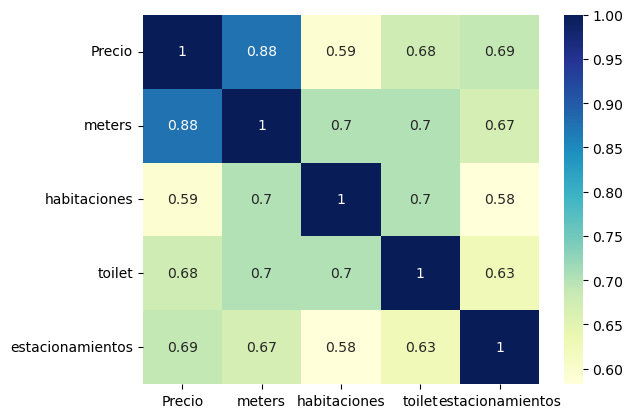

In [3]:
sn.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

array([[<Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'meters'}>],
       [<Axes: title={'center': 'habitaciones'}>,
        <Axes: title={'center': 'toilet'}>],
       [<Axes: title={'center': 'estacionamientos'}>, <Axes: >]],
      dtype=object)

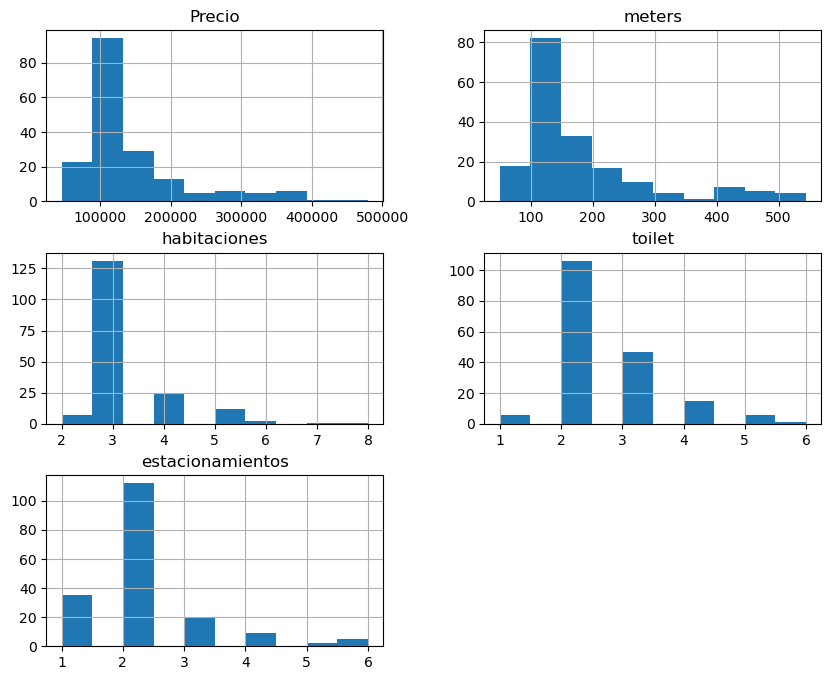

In [4]:
df.hist(figsize=(10,8))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 197
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Precio            183 non-null    int64  
 1   meters            181 non-null    float64
 2   habitaciones      178 non-null    float64
 3   toilet            181 non-null    float64
 4   estacionamientos  183 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 8.6 KB


In [16]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 197
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Precio            174 non-null    int64  
 1   meters            174 non-null    float64
 2   habitaciones      174 non-null    float64
 3   toilet            174 non-null    float64
 4   estacionamientos  174 non-null    float64
 5   Sum               174 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


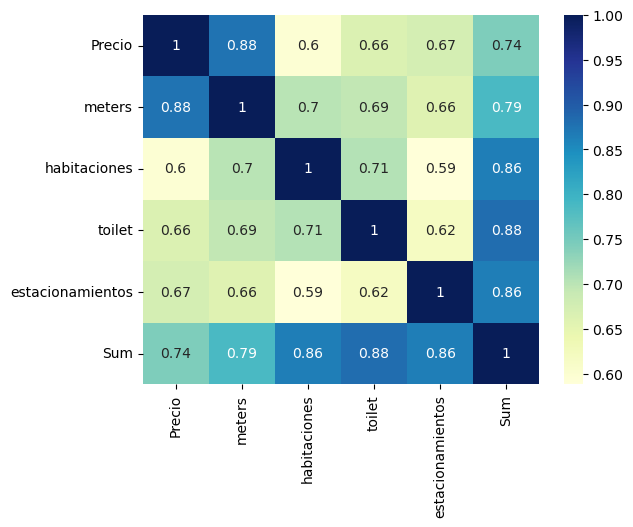

In [17]:
df['Sum'] =  df[['toilet','habitaciones','estacionamientos']].sum(axis=1)
df
sn.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [158]:
from sklearn.model_selection import train_test_split

X = df.drop(['Precio'], axis=1)
y = df['Precio']


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [174]:
X_train

,meters,habitaciones,toilet,Sum
26,102.0,3.0,2.0,7.0
184,420.0,5.0,5.0,14.0
3,123.0,3.0,2.0,7.0
123,143.0,3.0,2.0,7.0
144,191.0,3.0,3.0,9.0
...,...,...,...,...
92,162.0,3.0,2.0,7.0
132,345.0,4.0,4.0,10.0
14,95.0,3.0,2.0,6.0
111,400.0,4.0,5.0,12.0


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [168]:
reg.score(X_test, y_test)

0.5203722459537464

In [169]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)


RandomForestRegressor()

In [170]:
forest.score(X_test, y_test)


0.6686504081577755

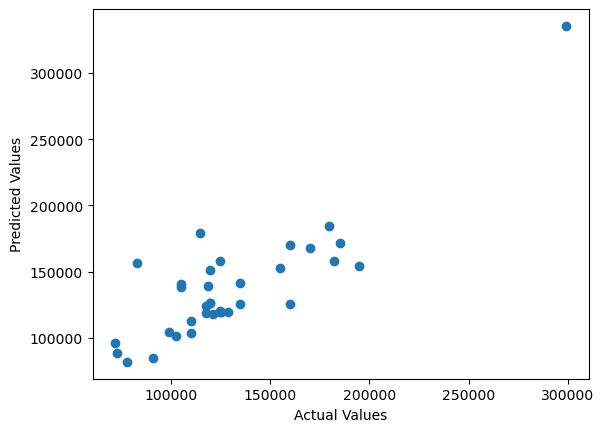

In [171]:
y_pred = forest.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()




In [172]:
y_pred

array([141708.36904762, 152689.        , 140860.        , 335395.5       ,
       139318.        , 150975.        , 156744.        , 118001.64666667,
        85166.75      , 157970.        , 158059.        ,  88912.86666667,
       125752.        , 119596.22666667, 112681.07666667, 179289.        ,
       104241.365     ,  96589.25      , 138485.        , 126063.        ,
       119596.22666667, 154620.        , 168059.        , 118777.5       ,
        81949.66666667, 120240.        , 103776.54333333, 184393.        ,
       101244.48460714, 171538.        , 170280.        , 126063.        ,
       124498.        , 119380.        , 125943.        ])

In [173]:
y_test

42     135000
38     155000
8      105000
129    299000
180    119000
28     120000
117     83000
103    121340
57      91000
69     182000
96     125000
175     73000
18     159900
22     125000
44     110000
110    115000
89      99000
2       72000
141    105000
105    120000
161    125367
179    195000
99     170000
104    118000
7       78000
189    125000
52     109999
143    179900
59     102500
27     185000
124    160000
87     120000
11     118000
115    128900
186    135000
Name: Precio, dtype: int64

<Axes: xlabel='Precio', ylabel='Count'>

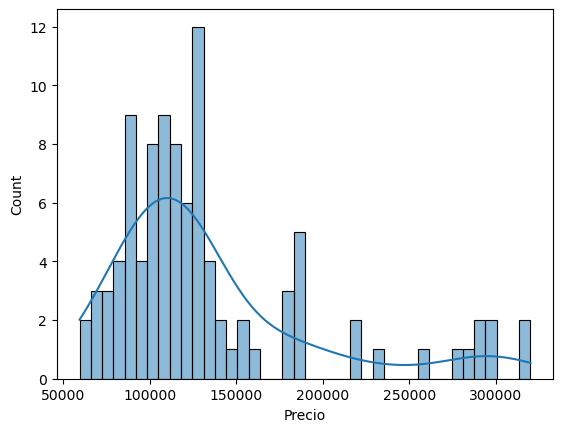

In [27]:
sn.histplot(df.Precio, kde=True,bins=40)


<Axes: xlabel='meters', ylabel='Precio'>

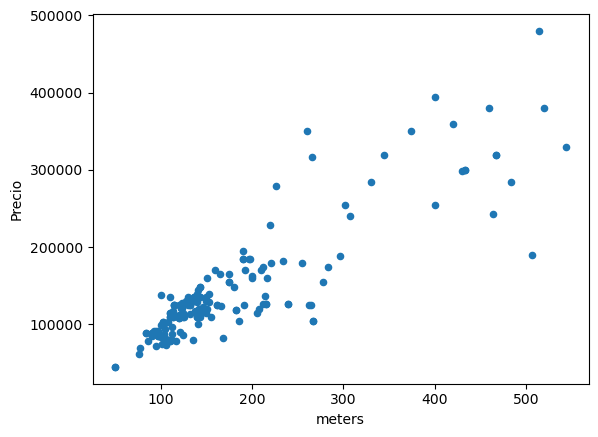

In [165]:
df.plot(x='meters', y='Precio', kind='scatter')
